# Exploring results (MD maps DARTEL 44 vs 33)

In [10]:
%run /home/grg/git/alfa/nilearn-helper.py
%matplotlib inline

In [11]:
paramtype = 'MD'
analysis_name='%s_DARTEL_csf5_44_vs_33'%paramtype
analyses_homedir = '/home/grg/spm/analyses/analysis_20170505/'
analysis_wd = osp.join(analyses_homedir , analysis_name)
nodes = [pickle.load(gzip.open(osp.join(analysis_wd, e, '_node.pklz'), 'rb')) 
         for e in ['modeldesign', 'estimatemodel','estimatecontrasts']]
print 'Found nodes .pklz files:', nodes

Found nodes .pklz files: [MD_DARTEL_csf5_44_vs_33.modeldesign, MD_DARTEL_csf5_44_vs_33.estimatemodel, MD_DARTEL_csf5_44_vs_33.estimatecontrasts]


In [12]:
n1, n2, n3 = nodes
print 'Used mask:', n1.inputs.explicit_mask_file
print '# of scans included in the analysis:', len(n1.inputs.in_files), '(first one: %s)'%n1.inputs.in_files[0]
display_html(pd.DataFrame([e for e in n3.inputs.contrasts], 
             columns=['contrast name', 'contrast type', 'covariate names', 'covariate weights']))

Used mask: /home/grg/spm/MNI_T1_brain_wo_csf.nii
# of scans included in the analysis: 203 (first one: /home/grg/dartel_csf.5/rswr10013_MD_t1space_wo_csf_nohdr.nii)


,contrast name,contrast type,covariate names,covariate weights
0,Apo4-4>Apo3-3,T,"[Apoe4-4, Apoe3-3]","[1.0, -1.0]"
1,Effect Gender,T,[gender],[1.0]
2,Effect Linear age,T,[age],[1.0]
3,Effect Educational Years,T,[educyears],[1.0]


In [13]:
mode = 'uncorrected'
#glassbrain_allcontrasts(analysis_wd, paramtype, mode=mode)

In [7]:
spm_mat_file = osp.join(n3.output_dir(), 'SPM.mat')
out = pyAAL.pyAAL(spm_mat_file, 9, k=10, mode=2)
pyAAL.to_dataframe(out)

creating tempfile /tmp/tmpJnkTy0.m
matlab -nodisplay -nodesktop -nosplash -nojvm -r "addpath('/home/grg/spm/analyses/analysis_20170505/MD_DARTEL_csf5_44_vs_33/estimatecontrasts');run('/tmp/tmpJnkTy0');quit"

Contrast: >> 


IndexError: list index out of range

/home/grg/spm/analyses/analysis_20170505/MD_DARTEL_csf5_44_vs_33/estimatecontrasts/spmT_0001.nii T
Saving to... /tmp/tmpBXDqsC.png


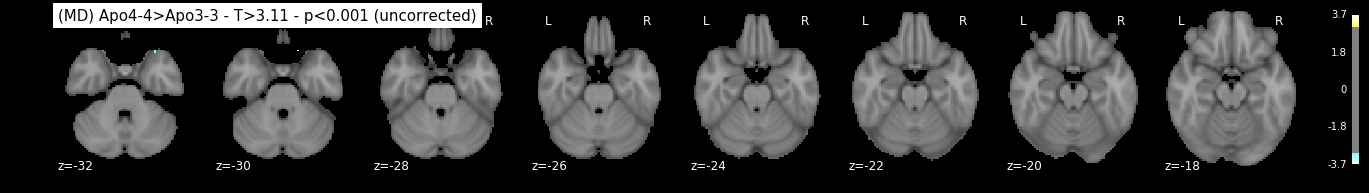

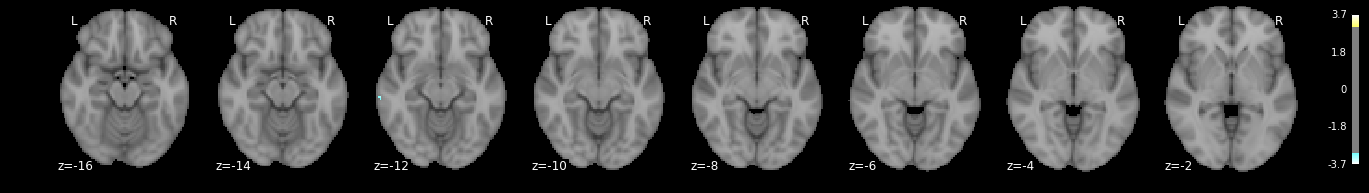

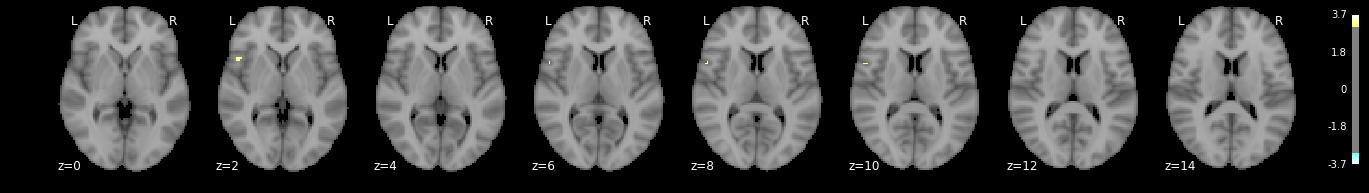

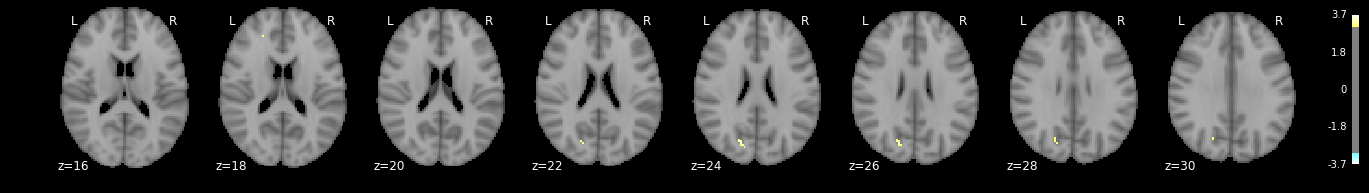

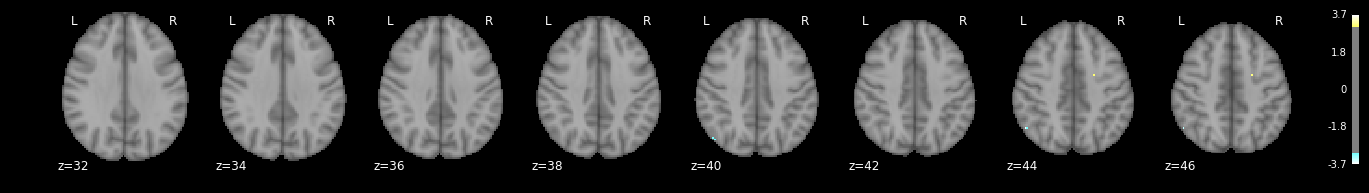

In [14]:
sections = sections_allcontrasts(analysis_wd, paramtype, axis='z', contrasts=[1])